# Problema 7
    
Evalúe, utilizando los métodos de Euler, de Heun y de Runge Kutta de cuarto orden, la ecuación diferencial

$\frac{dy}{dx}=4 e^{0.8 x}-0.5 y$

con la condición de contorno y(0) = 2, desde x = 0 hasta x = 4, con varios tamaños de paso. Compare la
exactitud de los diferentes métodos con el resultado exacto en x = 4, y=75.3389626 . Grafique este error
en función del esfuerzo de cálculo realizado (cantidad de veces que tuvo que evaluar la función). Compare la
soluciones numéricas obtenidas, y(x), con la solución teórica 

$y(x)= \frac{4}{1.3}(e^{0.8 x}-e^{-0.5 x})+2e^{-0.5 x}$

In [75]:
import numpy as np
import matplotlib.pyplot as plt
f= lambda x,y: 4*np.exp(0.8*x)-0.5*y
Y= lambda x: (4/1.3)*(np.exp(0.8*x)-np.exp(-0.5*x)) + 2*np.exp(-0.5*x)
y0=2
x0=0
xn=4
n=10

# Euler

In [98]:
def euler(x0,xn,y0,n):
    y=[y0]
    x=np.linspace(x0, xn, n+1)
    h=(xn-x0)/n
    esf=0
    for i in range(n):
        y.append(y[i]+f(x[i],y[i])*h)
        esf+=1
    plt.plot(x,y,x,Y(x))
    err=(y[len(y)-1]-Y(x[len(x)-1]))/Y(x[len(x)-1])
    return y, esf, err

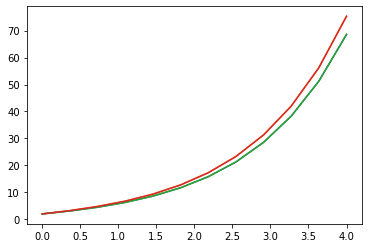

In [99]:
euler(x0,xn,y0,n)
yEuler=euler(x0,xn,y0,n)[0]

# Heun

In [96]:
def Heun(x0, xn, y0, n):
    y=[y0]
    x=np.linspace(x0, xn, n+1)
    h=(xn-x0)/n
    esf=0
    for i in range(0,n):
        y.append(y[i]+((f(x[i],y[i])+f(x[i]+h,y[i]+f(x[i],y[i])*h))/2)*h)
        esf+=2
    err=(y[len(y)-1]-Y(x[len(x)-1]))/Y(x[len(x)-1])
    h=(xn-x0)/n
    plt.plot(x,y,x,Y(x))
    return y, esf, err
#y=[y0]+[y[i]+((f(x[i],y[i])+f(x[i+1],y[i+1]))/2)*h for i in range(len(x)-1)]
#y=np.array(y).ravel()

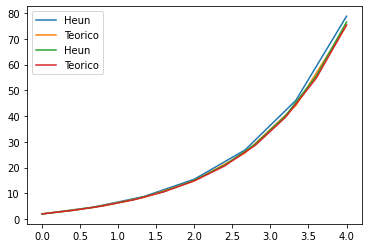

In [81]:
Heun(x0,xn,y0,6)
yHeun=Heun(x0,xn,y0,n)[0]

# Runge Kutta de 4to orden

In [82]:
def Kutta(x0, xn, y0, n):
    x=np.linspace(x0, xn, n+1)
    h=(xn-x0)/n
    y=[y0]
    esf=0
    for i in range(n):
        k1=f(x[i],y[i])
        k2=f(x[i]+(h/2),y[i]+(h*k1/2))
        k3=f(x[i]+(h/2),y[i]+(h*k2/2))
        k4=f(x[i]+h,y[i]+k3*h)
        y.append(y[i]+(h/6)*(k1+2*k2+2*k3+k4))
        esf+=4
    plt.plot(x,y,x,Y(x))
    err=(y[len(y)-1]-Y(x[len(x)-1]))/Y(x[len(x)-1])
    return y, esf, err

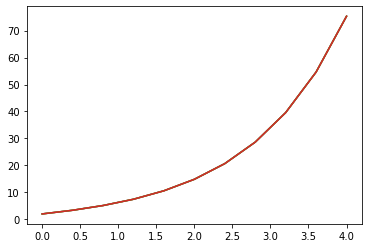

In [83]:
Kutta(x0,xn,y0,n)
yKutta=Kutta(x0,xn,y0,n)[0]

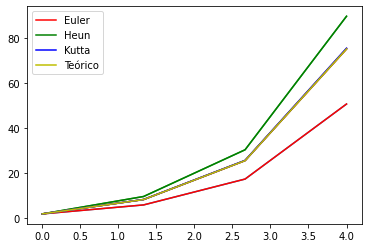

In [111]:
n=3
x=np.linspace(x0, xn, n+1)
plt.plot(x,euler(x0,xn,y0,n)[0], "r", label="Euler")
plt.plot(x, Heun(x0,xn,y0,n)[0], "g", label="Heun")
plt.plot(x, Kutta(x0,xn,y0,n)[0], "b", label="Kutta")
plt.plot(x, Y(x), "y", label="Teórico")
plt.legend()
plt.show()


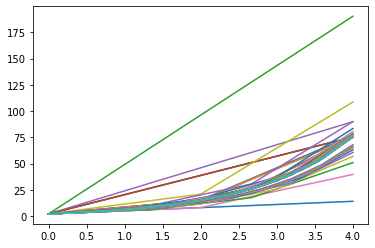

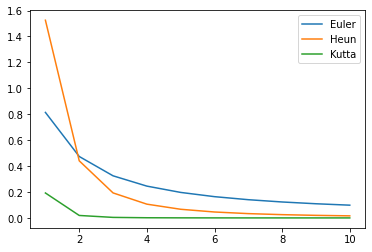

In [112]:
errE=[]
errH=[]
errK=[]
n=11
NE=[]; NH=[]; NK=[]
for i in range(1,n):
    errE.append(-euler(x0,xn,y0,i)[2])
    errH.append(Heun(x0,xn,y0,i)[2])
    errK.append(Kutta(x0,xn,y0,i)[2])

N=np.arange(1,n)
plt.figure()
plt.plot(N, errE,"-", label="Euler")
plt.plot(N, errH,"-", label="Heun")
plt.plot(N, errK,"-", label="Kutta")
plt.legend()
